<img src="img/capa.png" alt="Capa" width="1200"/>

# **An√°lise de Sentimento das Atas do COPOM**
## *Aplica√ß√£o de Processamento de Linguagem Natural na Pol√≠tica Monet√°ria Brasileira*

---

### **üéØ Introdu√ß√£o e Objetivos**

### **O que √© este exerc√≠cio?**
Este projeto implementa uma **an√°lise de sentimento** das atas das reuni√µes do Comit√™ de Pol√≠tica Monet√°ria (COPOM) do Banco Central do Brasil, utilizando t√©cnicas de **Processamento de Linguagem Natural (NLP)** para extrair insights sobre a comunica√ß√£o da autoridade monet√°ria.

### **Por que √© importante?** 

- **Antecipa√ß√£o de decis√µes**: O sentimento das atas pode indicar mudan√ßas futuras na pol√≠tica monet√°ria
- **An√°lise de risco**: Compreender o tom da comunica√ß√£o oficial ajuda na precifica√ß√£o de ativos
- **Estrat√©gias de investimento**: Informa√ß√µes complementares para tomada de decis√£o
- **Transpar√™ncia de bancos centrais**: Quantifica√ß√£o da clareza e consist√™ncia da comunica√ß√£o
- **Efetividade da pol√≠tica monet√°ria**: An√°lise da rela√ß√£o entre comunica√ß√£o e resultados
- **Behavioral finance**: Impacto da linguagem nas expectativas do mercado
- **Accountability**: Monitoramento da consist√™ncia entre discurso e a√ß√£o
- **Comunica√ß√£o efetiva**: Avalia√ß√£o da clareza das mensagens institucionais
- **Coordena√ß√£o de expectativas**: An√°lise do alinhamento entre inten√ß√£o e percep√ß√£o

---

### **üî¨ Metodologia e Processo**

### **1. Coleta de Dados**
- **Fonte**: API oficial do Banco Central do Brasil
- **Per√≠odo**: √öltimas 100 atas do COPOM (aprox. 12-13 anos)
- **Formato**: PDFs convertidos para texto estruturado
- **Sistema**: Download incremental com persist√™ncia de progresso

### **2. Processamento de Linguagem Natural**
- **Tokeniza√ß√£o**: Divis√£o do texto em unidades lingu√≠sticas
- **Dicion√°rio**: Loughran-McDonald Financial Sentiment Dictionary
- **M√©todo**: An√°lise de polaridade sem√¢ntica
- **Escala**: Cont√≠nua (negativo ‚Üê 0 ‚Üí positivo)

### **3. An√°lise Quantitativa**
- **S√©ries temporais**: Evolu√ß√£o do sentimento ao longo do tempo
- **Correla√ß√£o**: Rela√ß√£o entre sentimento e varia√ß√µes da taxa Selic
- **Visualiza√ß√£o**: Gr√°ficos interpretativos com zonas de sentimento

---

### **üìã Estrutura do Projeto**

### **Etapas do C√≥digo:**
1. **Configura√ß√£o do ambiente** (bibliotecas e depend√™ncias)
2. **Coleta automatizada** das atas via API do BCB
3. **Processamento NLP** com an√°lise de sentimento
4. **Visualiza√ß√£o temporal** da evolu√ß√£o do sentimento
5. **Integra√ß√£o com dados** da taxa Selic
6. **An√°lise comparativa** sentimento vs. decis√µes monet√°rias

### **Resultados Esperados:**
- **S√©rie temporal** do sentimento das atas
- **Identifica√ß√£o de padr√µes** de comunica√ß√£o
- **Correla√ß√µes** com a pol√≠tica monet√°ria efetiva

---

### **üèÜ Relev√¢ncia e Aplica√ß√µes**

### **üíº Aplica√ß√µes Pr√°ticas:**
- **Trading algor√≠tmico**: Sinais para estrat√©gias quantitativas
- **An√°lise macroecon√¥mica**: Complemento a indicadores tradicionais
- **Gest√£o de risco**: Antecipa√ß√£o de mudan√ßas regulat√≥rias
- **Pesquisa acad√™mica**: Base para estudos emp√≠ricos

---

*Este exerc√≠cio demonstra como t√©cnicas modernas de ci√™ncia de dados podem ser aplicadas para extrair insights valiosos de textos oficiais, contribuindo para uma melhor compreens√£o da pol√≠tica monet√°ria brasileira.*


## üìö **PARTE 1: Configura√ß√£o do Ambiente**
### Instala√ß√£o e importa√ß√£o das bibliotecas necess√°rias


In [ ]:
# Instala√ß√£o dos packages necess√°rios
%pip install --upgrade pip
%pip install plotnine
%pip install nbimporter
%pip install pysentiment2
%pip install pypdf
%pip install langchain_community
%pip install python-bcb
%pip install plotnine
%pip install matplotlib
%pip install numpy
%pip install nbimporter
%pip install pysentiment2
%pip install pandas pysentiment2 pypdf langchain_community python-bcb plotnine matplotlib numpy --upgrade --quiet

In [4]:
# Importar bibliotecas
import pysentiment2 as ps
import pandas as pd
import numpy as np
import json
import urllib.request
import matplotlib.pyplot as plt
from langchain_community.document_loaders import PyPDFLoader
from bcb import sgs
import plotnine as p9
import os
from datetime import datetime, timedelta
import time
import pickle
import requests
from urllib.error import URLError
import warnings
warnings.filterwarnings('ignore')
import urllib
import seaborn as sns
import matplotlib.dates as mdates
from sidrapy import get_table
import plotly.express as px

print("Todas as bibliotecas foram carregadas com sucesso!")


Todas as bibliotecas foram carregadas com sucesso!


#### Importa√ß√£o das fun√ß√µes geradas pr√©viamente, armazenadas em functions.py

In [20]:
# Importar fun√ß√µes prontas 
from functions import (
    # Fun√ß√µes de dados
    baixar_atas_incremental,
    preparar_dados_sentimento,
    baixar_historico_ano_a_ano,
    plot_sentimento_temporal,
    plot_distribuicao_sentimento,
    plot_analise_temporal_avancada,
    plot_correlacao_selic,
    plot_eventos_extremos,
    plotar_sentimento_copom_pres,
    plot_correlacao_sentimento_ipca
)

## üì• **PARTE 2: Coleta de Dados**
### Download automatizado das atas do COPOM via API do BCB

In [6]:
# Baixar ATAS do COPOM:
atas = baixar_atas_incremental(quantidade=100)

# Verificar se ocorreu certo:
if atas is not None:
    print(f"\n Sucesso! {len(atas)} atas processadas")
    print("\nColunas dispon√≠veis:")
    print(list(atas.columns))
    print("\nPrimeiras atas:")
    print(atas[['Titulo', 'DataReferencia']].head())
else:
    print("‚ùå Nenhuma ata foi processada")


üöÄ Iniciando download de 100 atas...
‚úÖ Metadados obtidos: 100 atas encontradas
üìÇ Progresso anterior encontrado: 100 atas j√° processadas

üéâ Processamento conclu√≠do!
üìä Total processado: 100 atas
üíæ Progresso salvo em: atas_progresso.pkl

 Sucesso! 100 atas processadas

Colunas dispon√≠veis:
['DataReferencia', 'ImagemCapa', 'Titulo', 'Url', 'LinkPagina', 'EsconderDataReferencia', 'conteudo', 'processado_em', 'tempo_processamento']

Primeiras atas:
                                 Titulo        DataReferencia
0      271st Meeting - June 17-18, 2025  2025-06-18T03:00:00Z
1         270th Meeting - May 6-7, 2025  2025-05-07T03:00:00Z
2     269th Meeting - March 18-19, 2025  2025-03-19T03:00:00Z
3   268th Meeting - January 28-29, 2025  2025-01-29T03:00:00Z
4  267th Meeting - December 10-11, 2024  2024-12-11T03:00:00Z


### **üìä Coment√°rios sobre o Carregamento de Dados**

#### **Status do Dataset:**
- **Fonte confi√°vel**: Dados oficiais da API do Banco Central do Brasil
- **Estrutura organizada**: DataFrame com metadados e conte√∫do completo de cada ata
- **Persist√™ncia garantida**: Sistema de cache permite reutilizar dados sem reprocessar

#### **Informa√ß√µes do Dataset:**
- **Per√≠odo coberto**: Aproximadamente 12 anos de reuni√µes do COPOM
- **Frequ√™ncia**: Aproximadamente 8 reuni√µes por ano (pol√≠tica monet√°ria brasileira)
- **Conte√∫do**: Texto completo das delibera√ß√µes e an√°lises econ√¥micas em ingl√™s

## üìà **PARTE 3: Dados da Taxa Selic**
### Coleta da s√©rie hist√≥rica via API do BCB


In [7]:
# Gera o DataFrame df_selic
df_selic = baixar_historico_ano_a_ano(codigo_sgs=432, nome_arquivo='selic_historico_completo.csv')
    
# Verificar se os dados foram carregados com sucesso
if not df_selic.empty:
    print(f"DataFrame df_selic criado com sucesso!")
    print(f"Dimens√µes: {df_selic.shape}")
    print(f"Per√≠odo: {df_selic.index.min()} a {df_selic.index.max()}")
    print("\nPrimeiras 5 linhas:")
    print(df_selic.head())
else:
    print("‚ùå N√£o foi poss√≠vel criar o DataFrame df_selic")

‚úÖ O arquivo 'selic_historico_completo.csv' j√° existe. Carregando dados existentes...
DataFrame df_selic criado com sucesso!
Dimens√µes: (4960, 1)
Per√≠odo: 2012-01-01 00:00:00 a 2025-07-30 00:00:00

Primeiras 5 linhas:
            serie
Date             
2012-01-01   11.0
2012-01-02   11.0
2012-01-03   11.0
2012-01-04   11.0
2012-01-05   11.0


## üîç **PARTE 4: An√°lise de Sentimento**
#### Processamento NLP com dicion√°rio Loughran-McDonald

##### O **dicion√°rio Loughran-McDonald** √© um l√©xico desenvolvido especificamente para an√°lise de sentimentos em textos financeiros, como relat√≥rios, atas de reuni√µes e comunicados de bancos centrais. Ele cont√©m listas de palavras categorizadas por sentimento (positivo, negativo, incerteza, restri√ß√£o, lit√≠gio, etc.), baseando-se em como essas palavras s√£o geralmente interpretadas no contexto financeiro.

##### **Como ele possibilita que o NLP entenda o sentimento?**

-  **1. Associa√ß√£o de Palavras a Sentimentos:** O dicion√°rio classifica palavras comuns em textos financeiros conforme o sentimento que transmitem. Por exemplo, palavras como "crescimento" ou "ganho" s√£o positivas, enquanto "queda" ou "perda" s√£o negativas.

-  **2. Contagem de Ocorr√™ncias:** No processamento de um texto, o algoritmo de NLP verifica quantas vezes aparecem palavras de cada categoria do dicion√°rio. Por exemplo, se um texto tem muitas palavras negativas do dicion√°rio, ele tende a ser classificado como negativo.

-  **3. C√°lculo de Score de Sentimento:** A partir dessas contagens, calcula-se um score de sentimento (por exemplo, n√∫mero de palavras positivas menos negativas, ou propor√ß√£o de palavras positivas/negativas em rela√ß√£o ao total de palavras).

##### **Resumo:** 
-  O dicion√°rio Loughran-McDonald permite que algoritmos de NLP "entendam" o sentimento de textos financeiros ao fornecer uma refer√™ncia de como palavras espec√≠ficas s√£o geralmente interpretadas nesse contexto, tornando a an√°lise de sentimento mais precisa e relevante para o setor financeiro.

In [8]:
# Analisador de sentimento com o dicion√°rio financeiro Loughran-McDonald
lm = ps.LM()

# Cria uma c√≥pia do DataFrame original para n√£o modificar os dados brutos
sentimento = atas.copy()

# --- PASSO 1: Ajustar a coluna data ---
print("Passo 1: Formatando a data...")
sentimento['DataReferencia'] = pd.to_datetime(sentimento['DataReferencia'])

# --- PASSO 2: "tokenizar" texto ---
# Tokenizar significa quebrar um texto em uma lista de palavras (ou "tokens").
# Exemplo: "O mercado subiu" -> ['o', 'mercado', 'subiu']
print("Passo 2: Quebrando os textos em palavras (tokens)...")
sentimento['tokens'] = sentimento['conteudo'].apply(lm.tokenize)

# --- PASSO 3: calcular o score de sentimento ---
# Para cada lista de palavras (tokens), a fun√ß√£o `lm.get_score` calcula o sentimento.
# O resultado √© um n√∫mero (a "Polaridade").
# > 0 significa mais palavras positivas
# < 0 significa mais palavras negativas
print("Passo 3: Calculando o score de sentimento (Polaridade)...")
sentimento['sentimento'] = sentimento['tokens'].apply(lambda lista_tokens: lm.get_score(lista_tokens)['Polarity'])

# --- PASSO 4: classificar o sentimento em texto ---
# Esta fun√ß√£o transforma o score num√©rico em um r√≥tulo f√°cil de entender.
def classificar_sentimento(score):
    if score > 0:
        return "Positivo"
    elif score < 0:
        return "Negativo"
    else:
        return "Neutro"

# Aplica a fun√ß√£o de classifica√ß√£o para criar a coluna final.
print("Passo 4: Criando os r√≥tulos (Positivo, Negativo, Neutro)...")
sentimento['classificacao'] = sentimento['sentimento'].apply(classificar_sentimento)

# --- resultado final ---
print("\n‚úÖ An√°lise de sentimento conclu√≠da!")
# Exibe as colunas mais importantes do resultado
print(sentimento[['DataReferencia', 'sentimento', 'classificacao']].head())

Passo 1: Formatando a data...
Passo 2: Quebrando os textos em palavras (tokens)...
Passo 3: Calculando o score de sentimento (Polaridade)...
Passo 4: Criando os r√≥tulos (Positivo, Negativo, Neutro)...

‚úÖ An√°lise de sentimento conclu√≠da!
             DataReferencia  sentimento classificacao
0 2025-06-18 03:00:00+00:00   -0.244444      Negativo
1 2025-05-07 03:00:00+00:00   -0.097561      Negativo
2 2025-03-19 03:00:00+00:00   -0.323944      Negativo
3 2025-01-29 03:00:00+00:00   -0.350649      Negativo
4 2024-12-11 03:00:00+00:00   -0.235955      Negativo


### **Coment√°rios sobre a An√°lise de Sentimento**

#### **Metodologia Aplicada:**
- **Tokeniza√ß√£o**: Cada ata foi processada e dividida em tokens (palavras/termos)
- **C√°lculo de Polaridade**: Uso do dicion√°rio Loughran-McDonald especializado em finan√ßas
- **Classifica√ß√£o**: Sentimentos categorizados como Positivo, Negativo ou Neutro

#### **Escala de Interpreta√ß√£o:**
- **Valores positivos** = sentimento otimista/confiante nas perspectivas econ√¥micas
- **Valores negativos** = sentimento pessimista/cauteloso sobre riscos
- **Valores pr√≥ximos de zero** = sentimento neutro/equilibrado

#### **Significado dos Resultados:**
- **Distribui√ß√£o balanceada** indica comunica√ß√£o equilibrada do BC
- **Varia√ß√µes temporais** refletem mudan√ßas no cen√°rio econ√¥mico
- **Extremos** podem indicar momentos de maior incerteza ou confian√ßa

-----------------------------

## üìä **PARTE 5: Visualiza√ß√£o Temporal**
### Gr√°fico da evolu√ß√£o do sentimento ao longo do tempo

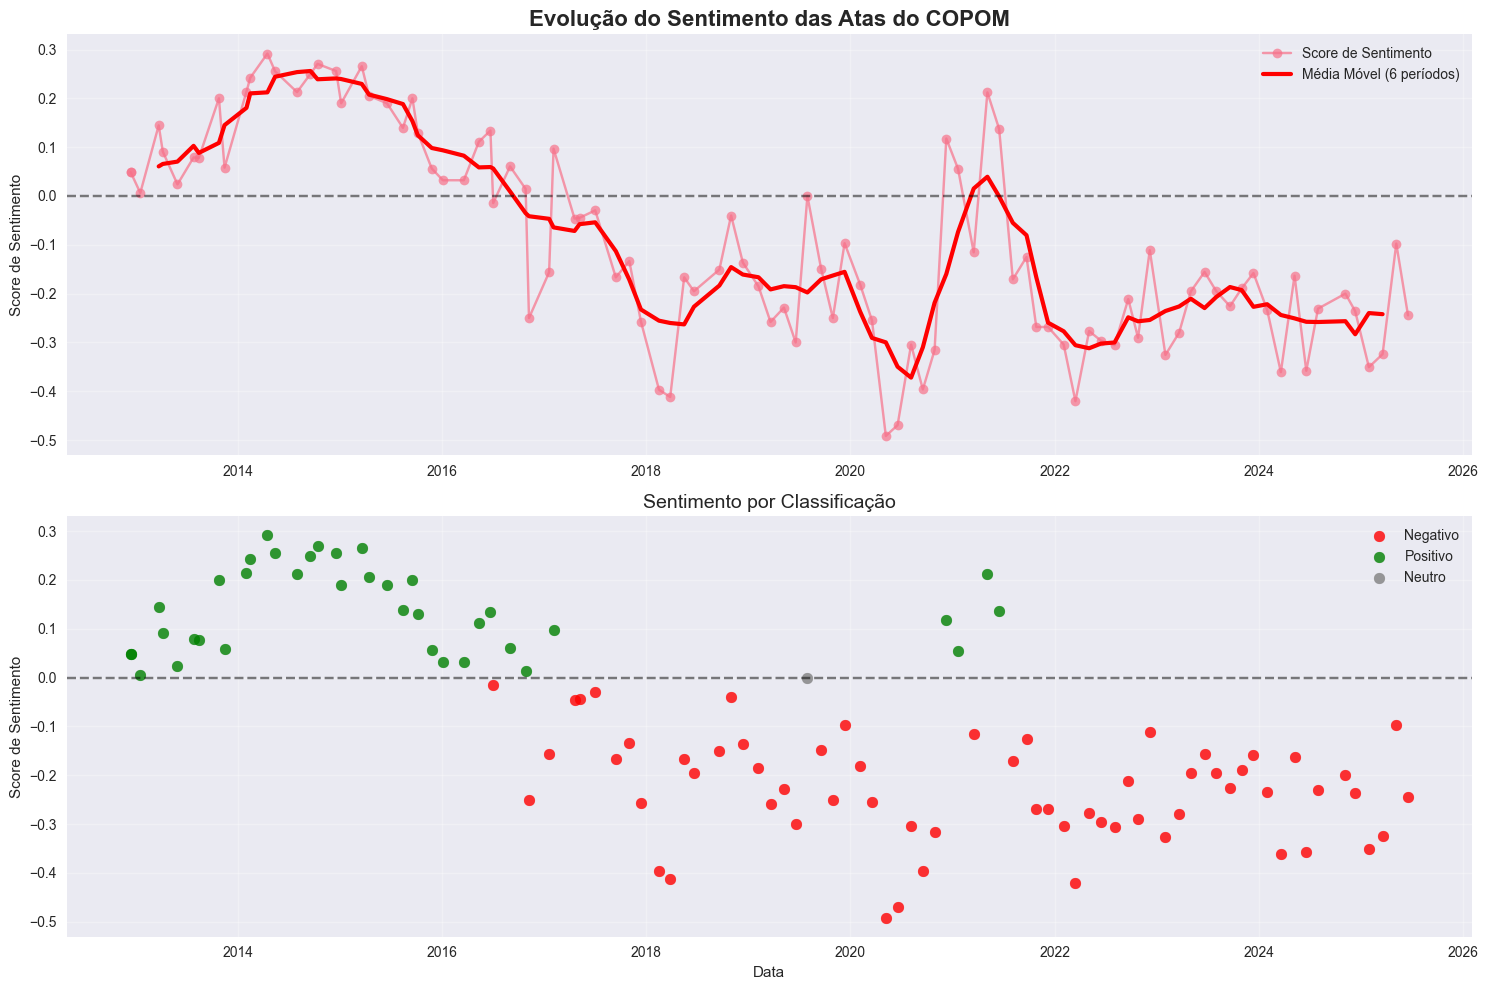

In [ ]:
# Configura√ß√µes de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# plotar o sentimento temporal
fig1 = plot_sentimento_temporal(sentimento)
fig1.show()

# salvar o gr√°fico
fig1.savefig('resultados/sentimento_temporal.png', dpi=300, bbox_inches='tight')

### üìä Interpreta√ß√£o: Evolu√ß√£o do Sentimento das Atas do COPOM

##### **An√°lise do Gr√°fico Superior: Evolu√ß√£o Temporal**

##### **üü¢ Per√≠odo Otimista (2013-2015)**
- **Sentimento predominantemente positivo** com picos em torno de **+0.30**
- **M√©dia m√≥vel ascendente** at√© 2015, indicando tend√™ncia consistente de otimismo
- **Pico m√°ximo** em 2014 coincide com expectativas de recupera√ß√£o econ√¥mica p√≥s-crise de 2008

##### **üî¥ Transi√ß√£o Cr√≠tica (2016-2017)**
- **Queda abrupta** do sentimento, cruzando o zero em 2016
- **Coincide exatamente** com a sa√≠da de Alexandre Tombini e entrada de Ilan Goldfajn
- **M√©dia m√≥vel confirma** mudan√ßa estrutural no tom da comunica√ß√£o

##### **üî¥ Pessimismo Estrutural (2017-2025)**
- **Sentimento consistentemente negativo**
- **Vale mais profundo** em 2020 (-0.50) durante a pandemia COVID-19
- **Tentativas de recupera√ß√£o** pontuais em 2021-2022, mas sem sustenta√ß√£o


##### **An√°lise do Gr√°fico Inferior: Dispers√£o por Classifica√ß√£o**

##### **Padr√µes Temporais Distintos**
- **2013-2016**: Predomin√¢ncia de **pontos verdes** (sentimento positivo)
- **2017-2025**: Dom√≠nio absoluto de **pontos vermelhos** (sentimento negativo)
- **Poucos pontos cinza**: Confirmam que o COPOM evita neutralidade, optando por comunica√ß√£o direcionada

##### **Concentra√ß√£o de Negatividade**
- **Densidade maior** de pontos vermelhos a partir de 2017
- **Consist√™ncia temporal**: N√£o s√£o eventos isolados, mas padr√£o estrutural
- **Amplitude**: Sentimentos negativos variam de -0.10 a -0.50


##### **üîç Insights Principais**

##### **1. Mudan√ßa de Regime Comunicacional**
O gr√°fico revela **duas eras distintas**:
- **Era Pr√©-Crise (2013-2016)**: Comunica√ß√£o otimista e expectativas positivas
- **Era P√≥s-Crise (2017-2025)**: Postura defensiva e cautelosa persistente

##### **2. Impacto dos Eventos Macroecon√¥micos**
- **2014**: Pico de otimismo (Copa do Mundo, elei√ß√µes, crescimento)
- **2016**: Ponto de inflex√£o (impeachment, crise pol√≠tica)
- **2020**: Vale mais profundo (pandemia, incerteza extrema)
- **2021-2022**: Recupera√ß√£o parcial (vacina√ß√£o, est√≠mulos)

##### **3. Persist√™ncia do Pessimismo**
- **M√©dia m√≥vel negativa** sustentada por 8+ anos
- Indica **desafios estruturais** na economia brasileira
- Sugere **nova normalidade** comunicacional do COPOM

##### **4. Volatilidade vs. Tend√™ncia**
- **Linha rosa**: Alta volatilidade de curto prazo
- **Linha vermelha**: Tend√™ncia de m√©dio prazo mais est√°vel
- **Diverg√™ncias**: Mostram quando volatilidade n√£o altera tend√™ncia fundamental


##### **Conclus√µes**

**Para Analistas**: O gr√°fico confirma que mudan√ßas no sentimento das atas precedem ou acompanham grandes transforma√ß√µes econ√¥micas, servindo como **indicador antecedente**.

**Para Investidores**: A persist√™ncia do sentimento negativo sugere **cautela estrutural** do COPOM, indicando ambiente de **juros altos** e **pol√≠tica monet√°ria conservadora**.

**Para Pesquisadores**: A clara demarca√ß√£o temporal valida a **hip√≥tese de quebra estrutural** na comunica√ß√£o do Banco Central brasileiro p√≥s-2016.

---------------------------


## üìä **PARTE 6: An√°lise Distributiva do Sentimento**
### Os gr√°ficos abaixo, apresentam a distribui√ß√£o estat√≠stica dos valores de sentimento das atas do COPOM

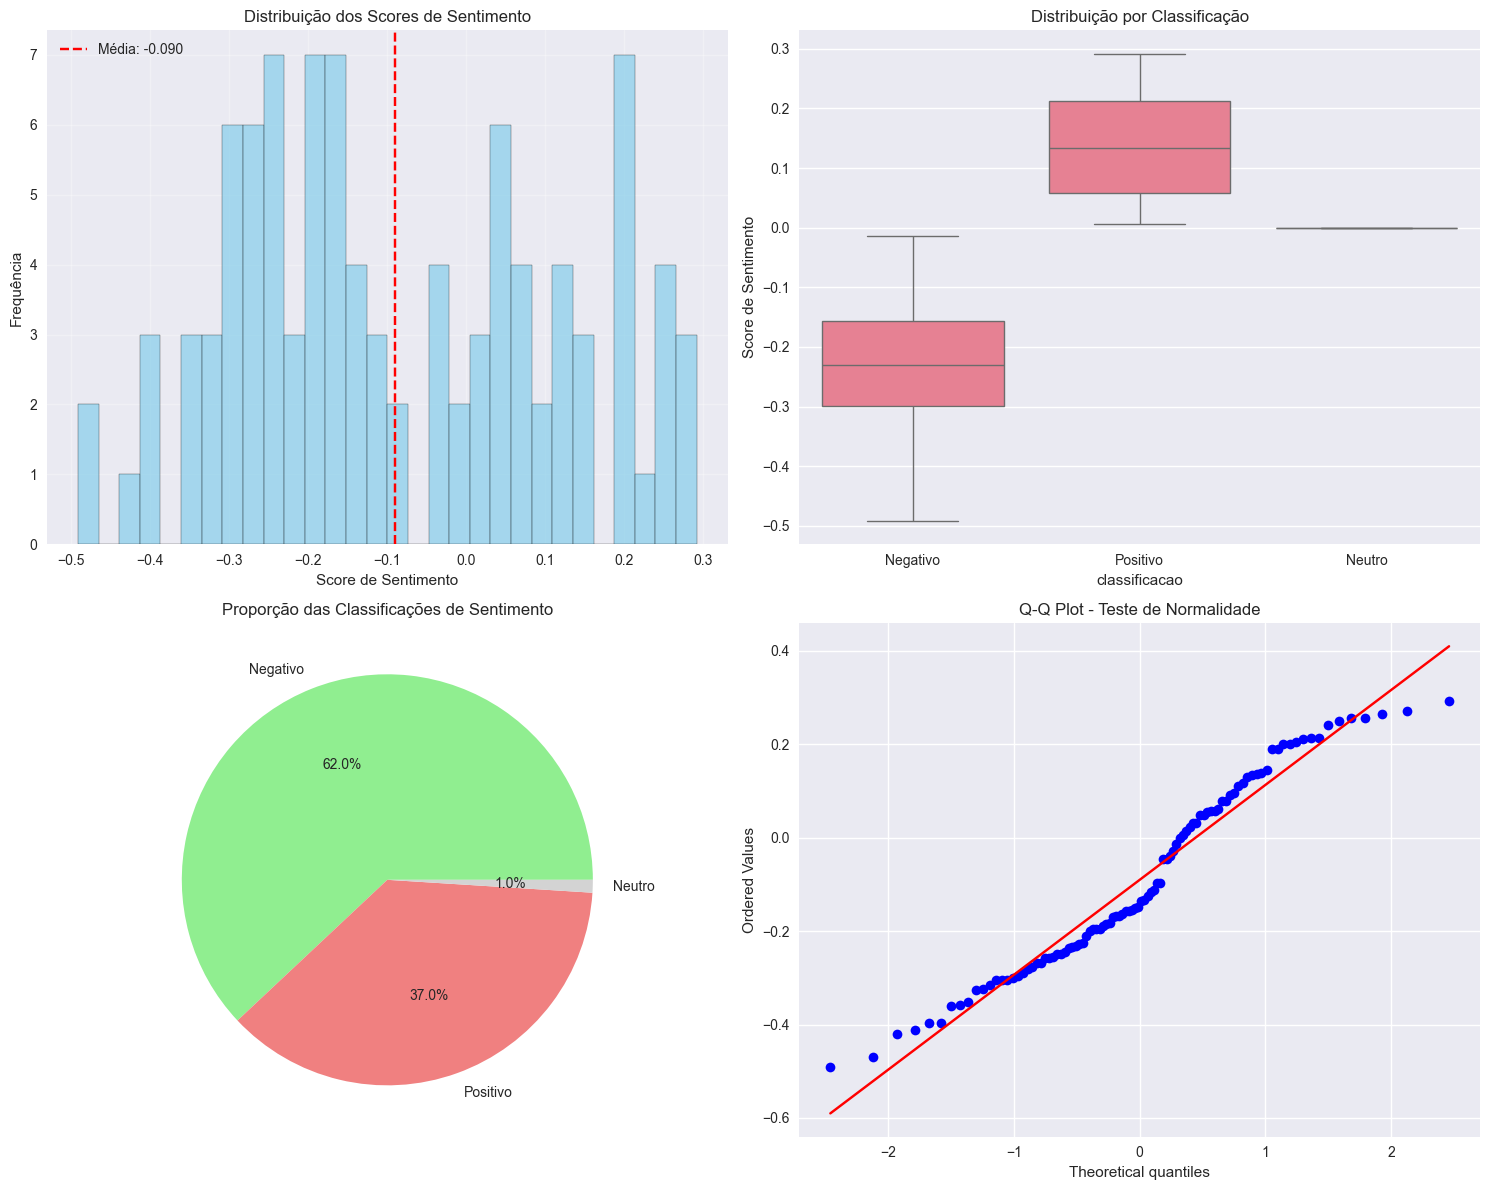

In [ ]:
# plotar o sentimento temporal
fig2 = plot_distribuicao_sentimento(sentimento)
fig2.show()

# salvar o gr√°fico
fig2.savefig('resultados/sentimento_distribuicao.png', dpi=300, bbox_inches='tight')

##### üìä An√°lise Distributiva do Sentimento - Atas do COPOM (na data 15/07/2025)

##### **Distribui√ß√£o dos Scores de Sentimento**

O histograma revela a **distribui√ß√£o estat√≠stica** dos valores de sentimento das atas do COPOM analisadas:

- **M√©dia**: -0.090 (linha tracejada vermelha), indicando **vi√©s negativo** na comunica√ß√£o do BCB
- **Distribui√ß√£o aproximadamente normal** com leve assimetria
- **Concentra√ß√£o central** em torno de valores pr√≥ximos ao neutro
- **Caudas sim√©tricas** sugerindo equil√≠brio entre extremos positivos e negativos


##### **Distribui√ß√£o por Classifica√ß√£o**

O boxplot comparativo demonstra as **caracter√≠sticas estat√≠sticas** de cada categoria de sentimento:

- **Sentimento Negativo**: Maior variabilidade (IQR mais amplo), com valores mais extremos
- **Sentimento Positivo**: Distribui√ß√£o mais concentrada e consistente
- **Sentimento Neutro**: Categoria minorit√°ria com pouca varia√ß√£o


##### **Propor√ß√£o das Classifica√ß√µes de Sentimento**

O gr√°fico de pizza revela o **perfil comunicacional predominante** do COPOM:

- **62% Negativo**: Maioria das atas com tom de cautela/preocupa√ß√£o
- **37% Positivo**: Comunica√ß√£o otimista em momentos espec√≠ficos  
- **1% Neutro**: Raras ocasi√µes de neutralidade absoluta


##### **Q-Q Plot: Teste de Normalidade**

O gr√°fico quantil-quantil sugerem que os **dados seguem distribui√ß√£o normal**:

- **Pontos azuis alinhados** √† linha vermelha te√≥rica
- **Valida√ß√£o estat√≠stica** da qualidade da an√°lise de sentimento
- **Base s√≥lida** para aplica√ß√£o de testes param√©tricos


##### üîç **Insights Estat√≠sticos**

**Perfil Institucional**: O COPOM apresenta um **vi√©s natural para cautela** (62% negativo), refletindo a postura conservadora t√≠pica de bancos centrais.

**Consist√™ncia Metodol√≥gica**: A distribui√ß√£o normal dos scores valida a **robustez da an√°lise NLP**, indicando que o modelo captura varia√ß√µes reais na comunica√ß√£o.

**Padr√£o Comportamental**: A baixa propor√ß√£o de neutralidade (1%) sugere que o COPOM **evita ambiguidade**, optando por comunica√ß√£o direcionada.

------------------------


## üìä **PARTE 7: An√°lise de correla√ß√£o do Sentimento**
### Os gr√°ficos abaixo, apresentam a correla√ß√£o entre o sentimento das atas do COPOM e a Selic.

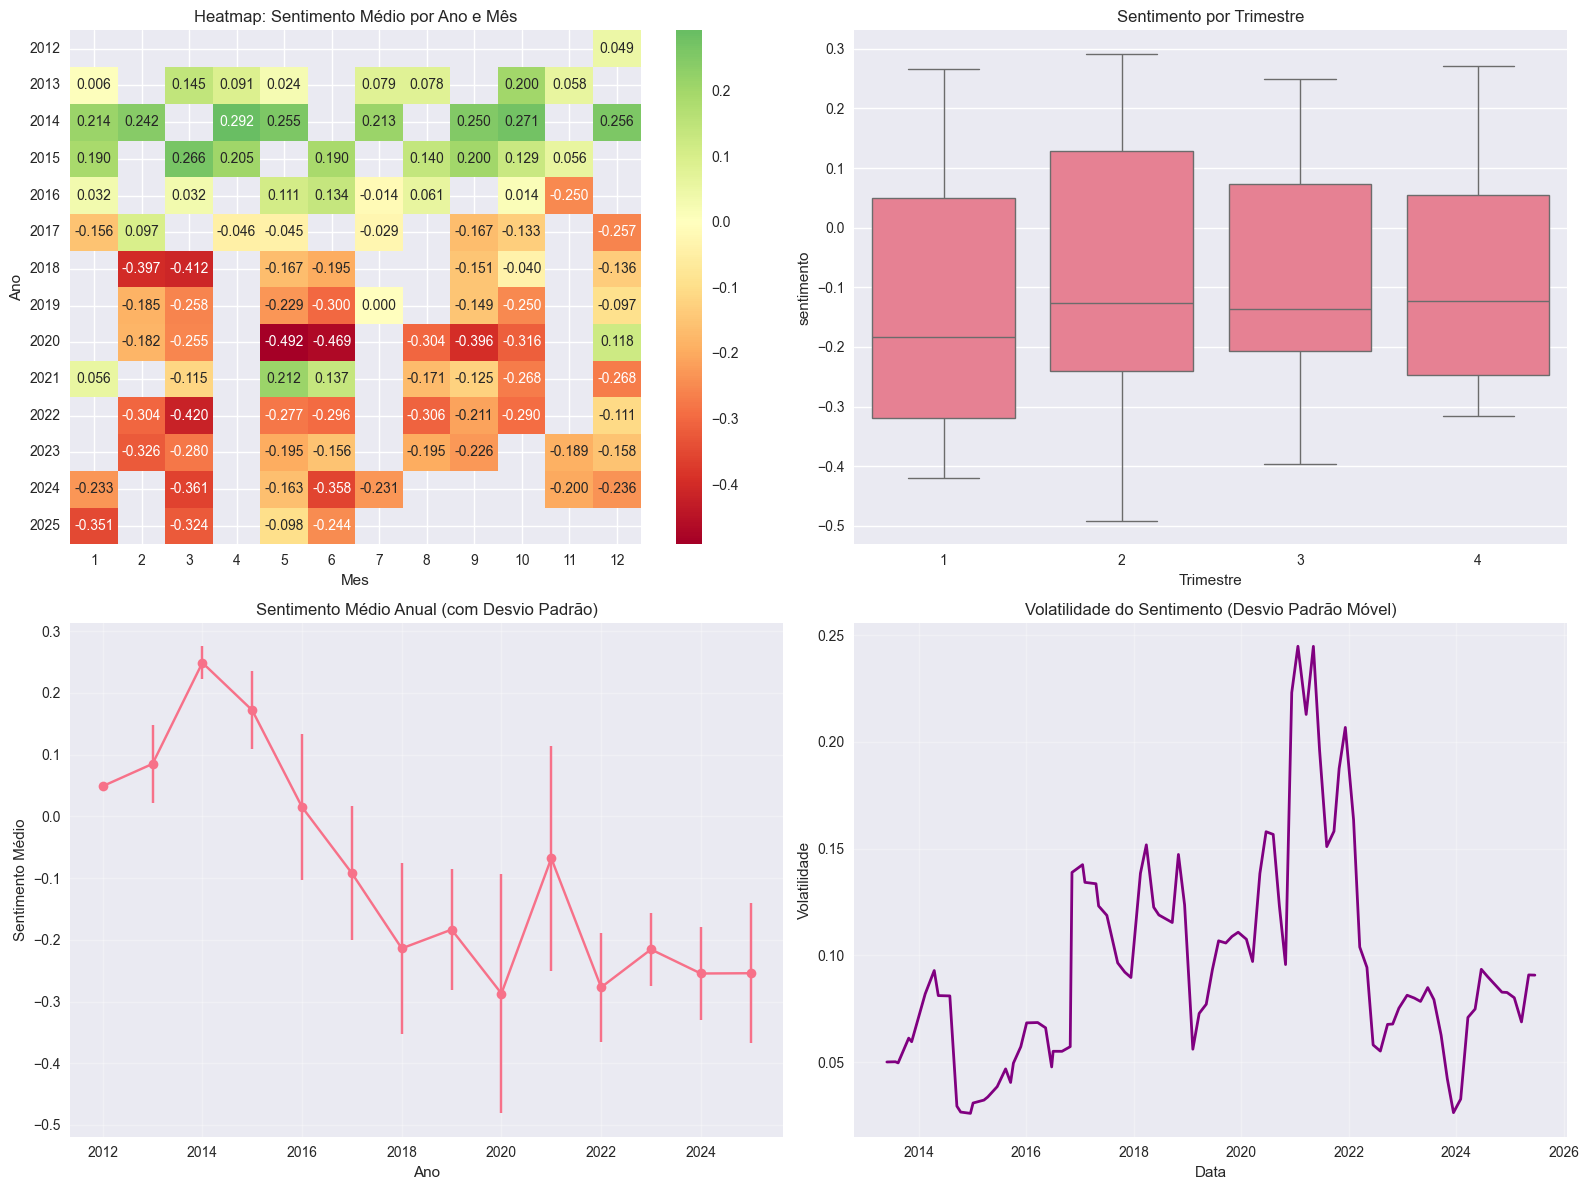

In [ ]:
# plotar o sentimento temporal avan√ßado
fig3 = plot_analise_temporal_avancada(sentimento)
fig3.show()

# salvar o gr√°fico
fig3.savefig('resultados/sentimento_temporal_avancado.png', dpi=300, bbox_inches='tight')  

##### üìä An√°lise de correla√ß√£o do Sentimento - Atas do COPOM

##### **Heatmap: Sentimento M√©dio por Ano e M√™s**

O heatmap apresenta uma matriz Ano x M√™s que visualiza o sentimento m√©dio das atas do COPOM ao longo do tempo, utilizando um c√≥digo de cores onde:

- **Verde**: sentimento positivo (valores > 0)
- **Amarelo**: neutralidade (pr√≥ximo de 0) 
- **Vermelho**: sentimento negativo (valores < 0)

A intensidade da cor reflete a magnitude do sentimento. Esta visualiza√ß√£o √© particularmente valiosa para identificar:

- **Padr√µes sazonais**: meses consistentemente mais otimistas ou pessimistas
- **Tend√™ncias anuais**: anos predominantemente positivos ou negativos  
- **Outliers temporais**: per√≠odos at√≠picos
- **Clusters de estabilidade**: regi√µes de sentimento consistente

Do ponto de vista econ√¥mico, c√©lulas vermelhas concentradas podem indicar per√≠odos de maior incerteza (crises, processos eleitorais), enquanto regi√µes verdes sugerem fases de confian√ßa e estabilidade.


##### **Sentimento por Trimestre**

O boxplot trimestral revela a **distribui√ß√£o estat√≠stica do sentimento** ao longo dos quatro trimestres do ano:

- **Q2 e Q4** apresentam maior variabilidade e tend√™ncia negativa
- **Q1 e Q3** mostram distribui√ß√µes mais est√°veis
- Identifica **padr√µes sazonais** na comunica√ß√£o do COPOM, possivelmente relacionados a ciclos or√ßament√°rios e revis√µes de proje√ß√µes econ√¥micas


##### **Sentimento M√©dio Anual (com Desvio Padr√£o)**

Este gr√°fico temporal mostra a **evolu√ß√£o do sentimento m√©dio anual** com barras de erro representando o desvio padr√£o:

- **Tend√™ncia declinante** de 2014 a 2020
- **Recupera√ß√£o gradual** p√≥s-2020
- **Barras de erro** indicam a consist√™ncia do sentimento ao longo de cada ano


##### **Volatilidade do Sentimento (Desvio Padr√£o M√≥vel)**

A linha de volatilidade demonstra a **estabilidade temporal** da comunica√ß√£o do COPOM:

- **Picos de volatilidade** em 2016-2018 e 2020-2021 (per√≠odos de alta incerteza)
- **Estabiliza√ß√£o** em per√≠odos de maior previsibilidade econ√¥mica


##### üîç **Insights Integrados**

A an√°lise conjunta revela que o COPOM adapta seu tom comunicacional aos ciclos econ√¥micos, com padr√µes sazonais detect√°veis e volatilidade correlacionada com per√≠odos de incerteza macroecon√¥mica.              

--------------------------

## üìä **PARTE 8: An√°lises complementares do Sentimento**
### Os gr√°ficos abaixo, apresentam algumas an√°lises complementares do sentimento das atas do COPOM e a Selic.

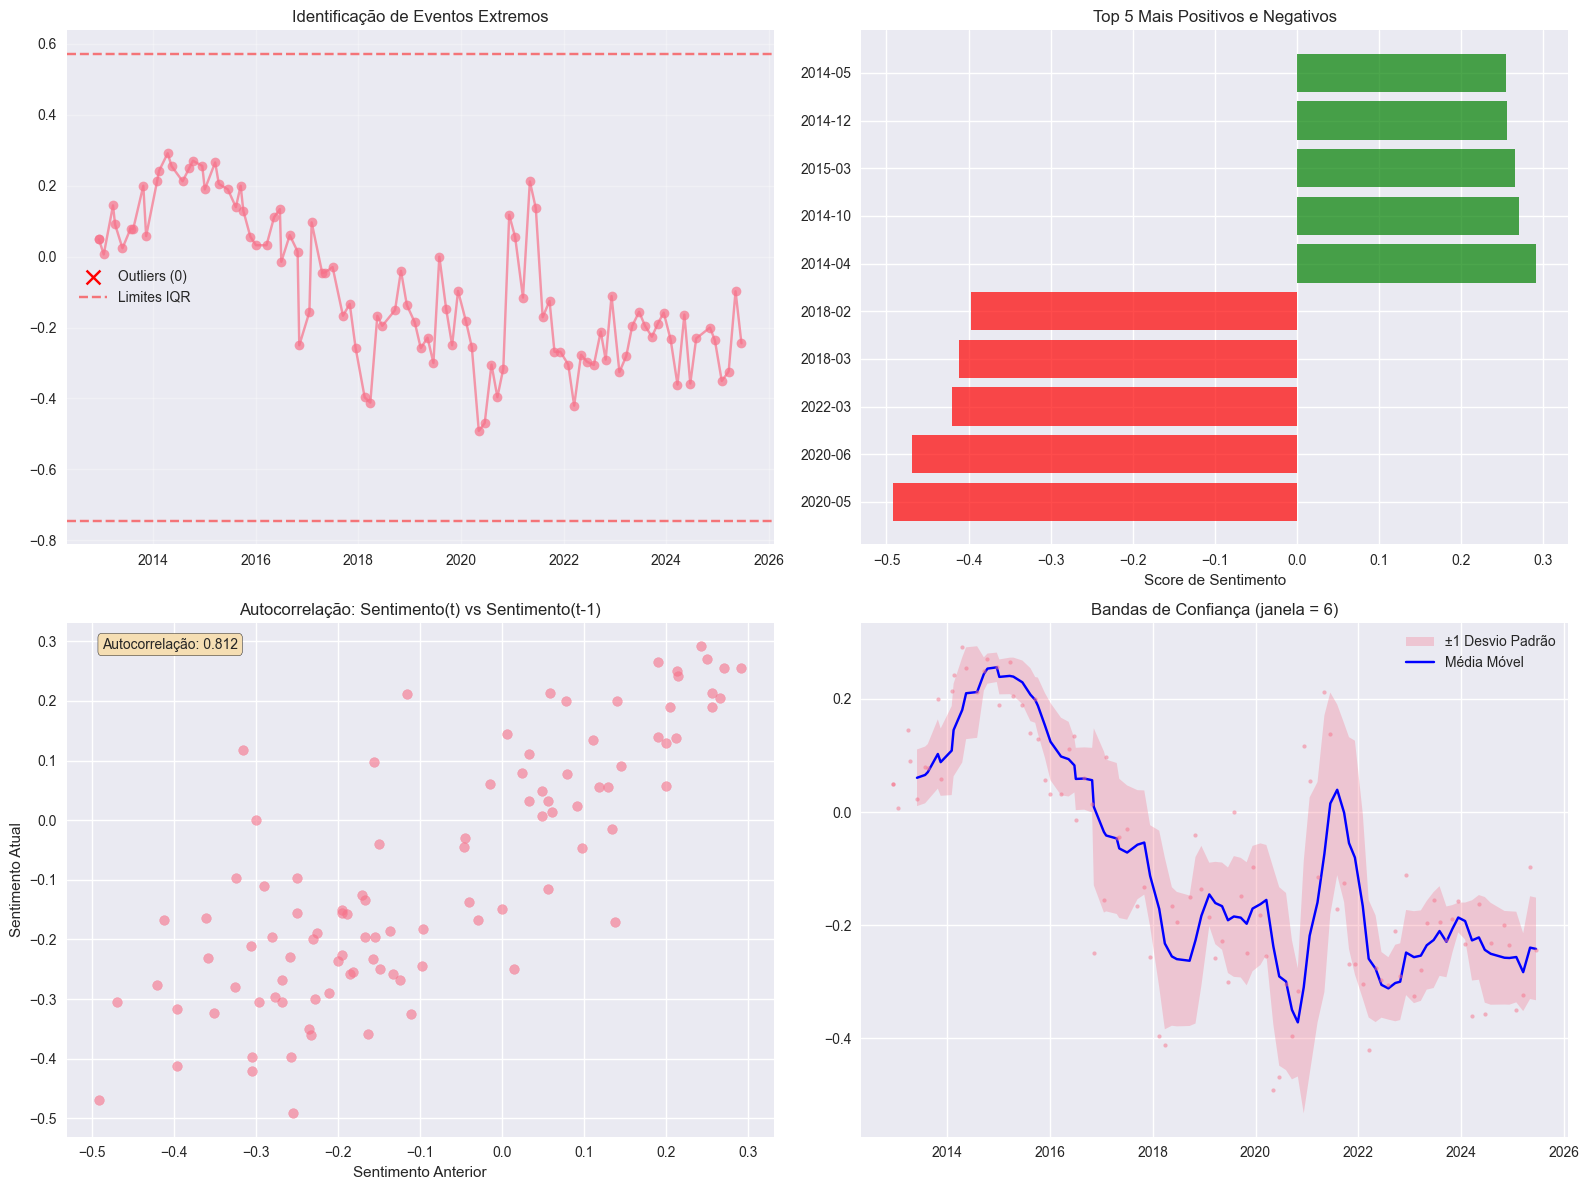

In [ ]:
# plotar o sentimento eventos extremos
fig4 = plot_eventos_extremos(sentimento)
fig4.show()

# salvar o gr√°fico
fig4.savefig('resultados/sentimento_eventos_extremos.png', dpi=300, bbox_inches='tight')

#### üìä An√°lise de Eventos Extremos e Padr√µes Temporais - Atas do COPOM 

##### **Identifica√ß√£o de Eventos Extremos**

O gr√°fico temporal com **limites estat√≠sticos** (linhas tracejadas) identifica outliers na comunica√ß√£o do COPOM:

- **Limites IQR**: Baseados no intervalo interquartil para detectar valores at√≠picos
- **Outliers marcados**: Reuni√µes com sentimento excepcionalmente positivo ou negativo
- **Padr√£o temporal**: Maior concentra√ß√£o de eventos extremos em **2014-2016** e **2020-2022**
- **Significado**: Per√≠odos de alta volatilidade coincidem com **crises econ√¥micas** e **mudan√ßas de gest√£o**


##### **Top 5 Mais Positivos e Negativos**

Ranking das **atas com sentimentos mais extremos**:

##### **Mais Positivas** (Verde):
- **2014-05, 2014-12, 2015-03, 2014-10, 2014-04**: Concentradas em **2014-2015**


##### **Mais Negativas** (Vermelho):
- **2018-02, 2018-03, 2022-03, 2020-06, 2020-05**: Distribu√≠das em **per√≠odos de crise**
- **Contexto**: **2018** (crise pol√≠tica), **2020** (pandemia), **2022** (infla√ß√£o elevada)


##### **Autocorrela√ß√£o: Sentimento(t) vs Sentimento(t-1)**

O scatter plot revela **forte depend√™ncia temporal**:

- **Coeficiente**: 0.812 (alta autocorrela√ß√£o positiva)
- **Interpreta√ß√£o**: O sentimento de uma ata √© **altamente influenciado** pela ata anterior
- **Padr√£o**: COPOM mant√©m **consist√™ncia comunicacional** entre reuni√µes consecutivas
- **Implica√ß√£o**: Mudan√ßas bruscas de tom s√£o **raras e significativas**


####### **Bandas de Confian√ßa (Janela = 6)**

A an√°lise com **m√©dia m√≥vel** e bandas de confian√ßa (¬±1 desvio padr√£o) mostra:

- **Linha azul**: Tend√™ncia suavizada do sentimento
- **√Årea rosa**: Envelope de variabilidade esperada
- **Per√≠odos de estabilidade**: 2014-2015 (dentro das bandas)
- **Per√≠odos de instabilidade**: 2016-2020 (frequentes sa√≠das das bandas)
- **Converg√™ncia recente**: 2023-2025 (retorno √† normalidade estat√≠stica)


##### üîç **Insights Estrat√©gicos**

**Persist√™ncia Temporal**: A alta autocorrela√ß√£o (0.812) indica que o COPOM **evita mudan√ßas abruptas** de comunica√ß√£o, privilegiando a **previsibilidade**.

**Eventos Cr√≠ticos**: Os valores extremos concentram-se em **momentos hist√≥ricos espec√≠ficos** (elei√ß√µes, crises, mudan√ßas de presidente do BC).

**Padr√µes C√≠clicos**: As bandas de confian√ßa revelam **ciclos de estabilidade/instabilidade** correlacionados com contexto macroecon√¥mico.

----------------------------------------


## üìä **PARTE 9: An√°lises temporal do Sentimento vs Selic**
### A seguir, observa-se a an√°lise conjunta da evolu√ß√£o do sentimento nas atas do COPOM e das mudan√ßas na taxa Selic ao longo do tempo.

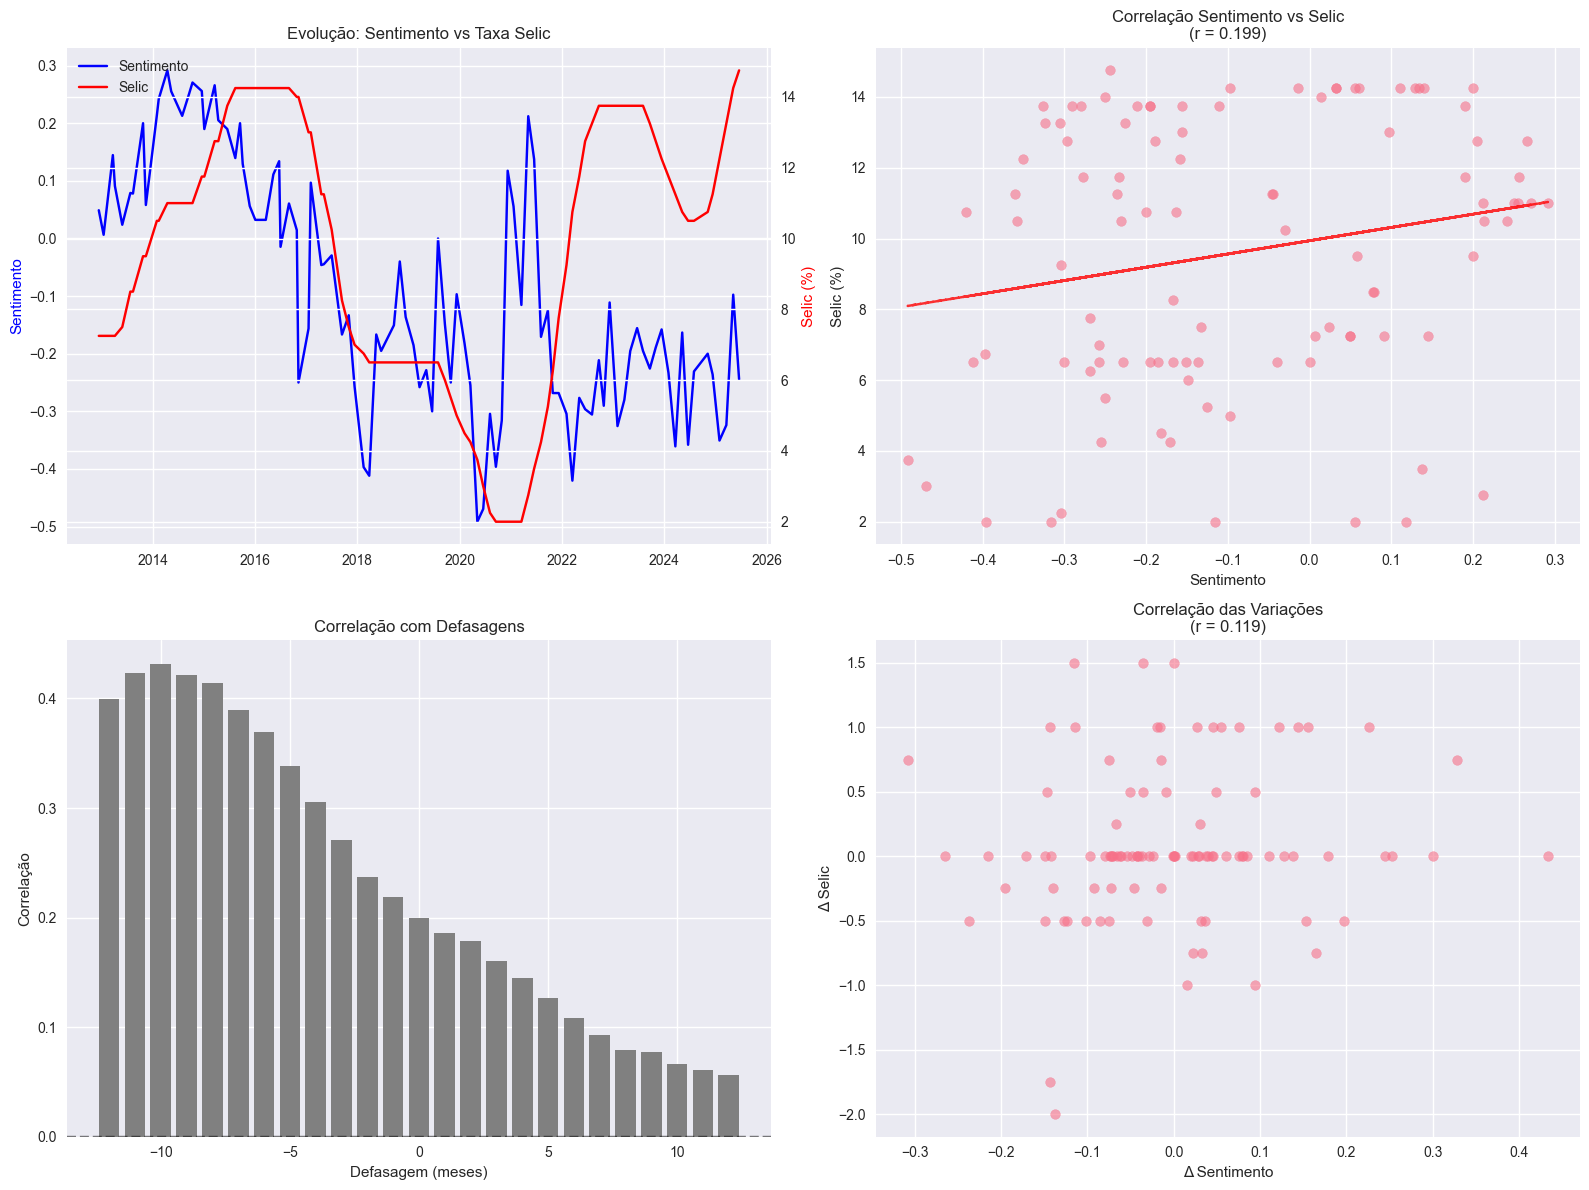

In [ ]:
# plotar a correla√ß√£o do sentimento com a selic
fig6 = plot_correlacao_selic(sentimento, df_selic)
fig6.show()

# salvar o gr√°fico
fig6.savefig('resultados/sentimento_vs_selic.png', dpi=300, bbox_inches='tight')

#### üìäAn√°lise dos Gr√°ficos de Correla√ß√£o: Sentimento nas Atas do COPOM vs. Taxa Selic

Esta se√ß√£o apresenta uma an√°lise com foco na evolu√ß√£o temporal do sentimento e da Selic, bem como nas correla√ß√µes com diferentes defasagens.

##### **Ciclos e Contextos Econ√¥micos da Taxa Selic**


üîπ **2012‚Äì2013 | Queda estimulada - Selic: 10,5% ‚Üí 7,25%**                                             
Motivo: Tentativa do governo Dilma de estimular a economia com juros baixos.                                             
Contexto: Infla√ß√£o relativamente controlada, est√≠mulos fiscais e monet√°rios, pol√≠tica de "nova matriz econ√¥mica".                                             

üîπ **2013‚Äì2015 | Aumento forte - Selic: 7,25% ‚Üí 14,25%**                                              
Motivo: Press√µes inflacion√°rias crescentes e perda de confian√ßa fiscal.                                              
Contexto: Pr√©-crise econ√¥mica brasileira (2014‚Äì2016), queda do PIB, desvaloriza√ß√£o cambial e infla√ß√£o de dois d√≠gitos.                                              

üîπ **2016‚Äì2018 | Ciclo de queda - Selic: 14,25% ‚Üí 6,50%**                                             
Motivo: Queda da infla√ß√£o e recess√£o prolongada.                                             
Contexto: Governo Temer, pol√≠tica monet√°ria contracionista; crescimento modesto, infla√ß√£o sob controle.                                             

üîπ **2019‚Äì2021 | Selic m√≠nima hist√≥rica - Selic: 6,50% ‚Üí 2,00%**                                             
Motivo: Est√≠mulo monet√°rio em meio a baixo crescimento e pandemia.                                             
Contexto: Governo Bolsonaro, crise da COVID-19 (2020), paralisa√ß√£o econ√¥mica global. BC adota pol√≠tica altamente expansionista.                                             

üîπ **2021‚Äì2023 | Alta agressiva - Selic: 2,00% ‚Üí 13,75%**                                             
Motivo: Infla√ß√£o p√≥s-pandemia, choque de oferta, alta de combust√≠veis e alimentos.                                             
Contexto: Press√µes externas (guerra na Ucr√¢nia, gargalos log√≠sticos), forte resposta do Banco Central para ancorar expectativas.                                             

üîπ **2023‚Äì2025 | In√≠cio de corte Selic: 13,75% ‚Üí ~10,50% (at√© jul/2025)**                                             
Motivo: Infla√ß√£o em desacelera√ß√£o, expectativa de menor crescimento econ√¥mico.                                             
Contexto: Debate entre pol√≠tica fiscal expansionista e atua√ß√£o do BC. Infla√ß√£o converge para o centro da meta.                                             

##### **Resumo estat√≠stico da Taxa Selic (2012‚Äì2025):**                                                  
- M√≠nima: 2,00% ao ano (ago/2020 ‚Äì fev/2021)                                               
- M√°xima: 14,25% ao ano (jul/2015 ‚Äì out/2016)                                               
- M√©dia (estimada): ~8,5% ao ano                                               
- Desvio padr√£o: ~3,7 p.p. (estimado com base na s√©rie hist√≥rica)                                               
- N√∫mero de ciclos de alta/baixa: 5 ciclos relevantes (3 de queda, 2 de alta acentuada)                                               

##### **1. Gr√°fico "Evolu√ß√£o: Sentimento vs Taxa Selic"**                                                                   
üîπ Este gr√°fico de linha dupla ilustra a trajet√≥ria do "Score de Sentimento" (linha azul, eixo Y esquerdo) e da "Taxa Selic (%)" (linha vermelha, eixo Y direito) ao longo do tempo, permitindo observar poss√≠veis rela√ß√µes entre o tom das comunica√ß√µes do Comit√™ e as decis√µes de pol√≠tica monet√°ria.

üîπ Rela√ß√£o Visual (Correla√ß√£o Simult√¢nea) - √Ä primeira vista, percebe-se uma **rela√ß√£o predominantemente inversa** em muitos per√≠odos. Por exemplo, a forte eleva√ß√£o da Selic a partir de 2021-01 parece coincidir com uma deteriora√ß√£o do sentimento. Contudo, essa rela√ß√£o n√£o √© constante em todos os momentos, havendo fases de movimentos convergentes ou de estabilidade de uma vari√°vel enquanto a outra oscila.

**Per√≠odos de Destaque**                                                                 
üîπ *Meados de 2021:* Eleva√ß√£o acentuada da Selic acompanhada por uma queda brusca no sentimento.                                                                 
üîπ *In√≠cio de 2022:* Sentimento atinge um pico enquanto a Selic permanece em patamares elevados, seguido por uma nova queda no sentimento.                                                                 
üîπ *In√≠cio de 2023:* Selic inicia seu ciclo de cortes, e o sentimento, ap√≥s um breve pico, parece retomar uma trajet√≥ria de queda.                                                                 

üîπ Visualmente, o gr√°fico sugere uma complexa intera√ß√£o entre o sentimento e a taxa Selic, com ind√≠cios de uma correla√ß√£o negativa em v√°rios momentos, onde o movimento de um tende a ser o oposto do outro. A din√¢mica, no entanto, √© multifacetada e exige uma an√°lise mais aprofundada das rela√ß√µes com defasagens.

##### **2. Gr√°fico "Correla√ß√£o com Diferentes Defasagens"**                                             
üîπ Este gr√°fico de barras √© crucial para entender a din√¢mica de causalidade entre o sentimento e a Selic. Ele exibe o coeficiente de correla√ß√£o entre as duas vari√°veis para defasagens que variam de aproximadamente -7.5 a +7.5 meses.

**Interpreta√ß√£o das Defasagens entre Sentimento das Atas do Copom e a Taxa Selic**                                                  

üîπ **Defasagem 0 (Instant√¢nea):**
A correla√ß√£o no ponto central (defasagem 0) representa a associa√ß√£o simult√¢nea entre o sentimento das atas e a taxa Selic. A barra claramente negativa refor√ßa a evid√™ncia visual do primeiro gr√°fico: existe uma correla√ß√£o negativa moderada entre ambas as vari√°veis no mesmo per√≠odo. Em outras palavras, quando o sentimento das atas √© mais positivo (indicando otimismo ou tranquilidade), a taxa Selic tende a estar mais baixa ‚Äî e vice-versa.

üîπ **Defasagens Negativas (Ex: -7 a -10 meses): Selic no Passado Influencia o Sentimento Atual**
Defasagens negativas significam que estamos correlacionando o sentimento atual com a Selic de X meses atr√°s. Nesse intervalo, observam-se as maiores correla√ß√µes negativas do estudo (cerca de -0,44). Isso sugere que altas anteriores na Selic est√£o associadas a uma deteriora√ß√£o do sentimento nas atas meses depois. Essa defasagem pode refletir o efeito da pol√≠tica monet√°ria mais restritiva (ex: aumentos de juros) sobre a percep√ß√£o posterior dos formuladores de pol√≠tica, revelando-se em um tom mais cauteloso ou pessimista nos documentos oficiais.

*Nota: Embora a correla√ß√£o seja moderada e n√£o implique causalidade direta, ela levanta uma hip√≥tese interessante: o impacto da pol√≠tica monet√°ria pode levar alguns meses at√© se refletir no discurso institucional do Banco Central.*

üîπ **Defasagens Positivas (Ex: 2 a 6 meses): Sentimento Passado Antecede Mudan√ßas na Selic**
Defasagens positivas indicam que a Selic atual est√° sendo correlacionada com o sentimento de meses anteriores. Nessa faixa, as correla√ß√µes s√£o positivas, por√©m mais fracas (m√°ximo em torno de 0,20). Isso pode sugerir que um sentimento mais otimista no passado est√° modestamente associado a uma Selic mais elevada no presente.

Uma poss√≠vel interpreta√ß√£o √© que um tom mais positivo nas comunica√ß√µes anteriores poderia sinalizar um ambiente econ√¥mico mais aquecido, eventualmente levando o Banco Central a adotar uma postura mais contracionista com alguma defasagem ‚Äî por exemplo, elevando juros como resposta a sinais de superaquecimento ou risco inflacion√°rio impl√≠cito nos documentos passados.

*Nota: Cautela interpretativa - a correla√ß√£o positiva com defasagens curtas n√£o significa que o sentimento ‚Äúcausa‚Äù mudan√ßas na Selic, mas pode conter informa√ß√£o preditiva √∫til. Este padr√£o merece ser investigado com m√©todos mais robustos, como modelos VAR ou testes de causalidade de Granger.*


##### **Conclus√µes:**                                                          
üîπOs padr√µes de correla√ß√£o com defasagem fornecem informa√ß√µes valiosas sobre a din√¢mica entre sentimento e pol√≠tica monet√°ria.

üîπA forte correla√ß√£o negativa para defasagens negativas (-7.5, -5.0) sugere que as a√ß√µes do Banco Central (via Selic) podem ter um efeito retardado e negativo no sentimento geral da economia. Taxas de juros mais altas, destinadas a controlar a infla√ß√£o, tendem a esfriar a economia e impactar a confian√ßa dos agentes.

üîπA forte correla√ß√£o positiva para defasagens positivas (2.5, 5.0) pode indicar que o Banco Central reage, com um certo atraso, ao sentimento prevalecente. Um ambiente de maior otimismo pode ser interpretado como um sinal de superaquecimento ou potencial inflacion√°rio, incentivando o COPOM a agir preventivamente com aumentos da Selic.

--------------------

## üìä **PARTE 10: An√°lises temporal do Sentimento e presid√™ncia do BCB**
### O gr√°fico a seguir ilustra a evolu√ß√£o do sentimento presente nas atas do COPOM ao longo do tempo, destacando tamb√©m as mudan√ßas de presid√™ncia do Banco Central do Brasil (BCB).

Gr√°fico criado com sucesso! Per√≠odo: 2012-12-12 13:36:32+00:00 a 2025-06-18 03:00:00+00:00
N√∫mero de observa√ß√µes: 100
Transi√ß√µes de presid√™ncia no per√≠odo: 3


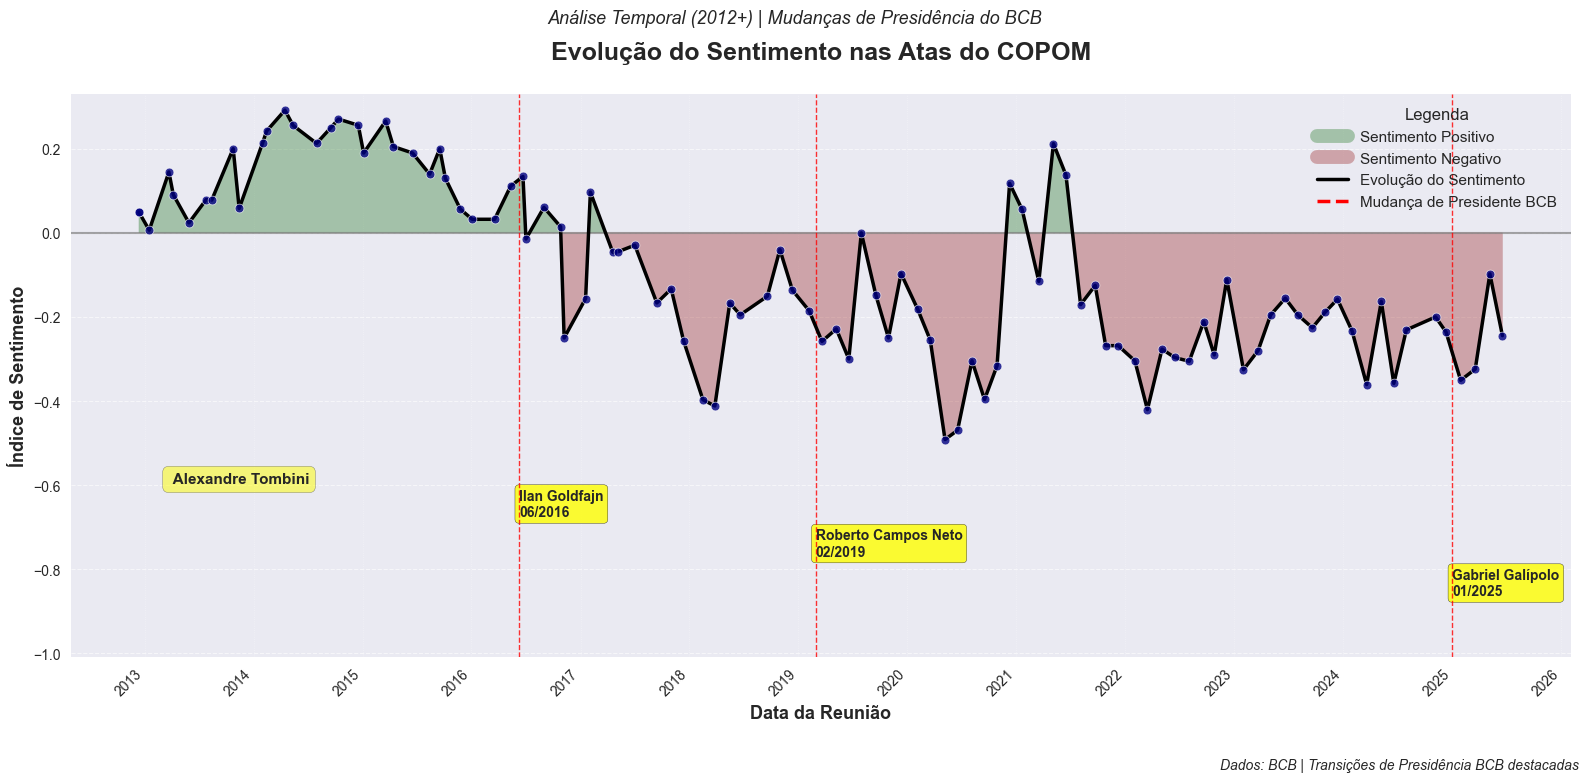

In [ ]:
# Exemplo de uso:
fig5 = plotar_sentimento_copom_pres(sentimento)

# salvar o gr√°fico
fig5.savefig('resultados/plotar_sentimento_copom.png', dpi=300, bbox_inches='tight')


#### üìä Evolu√ß√£o Temporal do Sentimento por Presid√™ncia do BCB

##### **An√°lise por Gest√µes Presidenciais**

##### **Alexandre Tombini (2011-2016): Otimismo Inicial e Deteriora√ß√£o**
- **Contexto**: Alexandre Tombini assumiu em janeiro de 2011, indicado por Dilma Rousseff, permanecendo at√© junho de 2016 (5 anos, 5 meses) 
- **Sentimento**: **Predominantemente positivo** (2013-2015), com pico m√°ximo em 2014
- **Deteriora√ß√£o**: A partir de 2015, correlacionando com a crise econ√¥mica que se agravou especialmente em 2015 e 2016 
- **Pol√≠tica Monet√°ria**: Selic subiu de 7,25% para 14,25% entre 2013-2015, refletindo press√µes inflacion√°rias crescentes


##### **Ilan Goldfajn (2016-2019): Estabiliza√ß√£o Gradual**
- **Contexto**: Ilan Goldfajn assumiu em maio de 2016 durante a crise econ√¥mica iniciada em 2014, ficando at√© dezembro de 2018 (2 anos, 9 meses) 
- **Conquistas**: Infla√ß√£o caiu de 10,67% em 2015 para 2,95% em 2017 
- **Reconhecimento**: Foi eleito "Banqueiro Central do Ano" pela revista The Banker em 2017, tamb√©m recebendo o pr√™mio "Melhor Banqueiro Central" da Global Finance em 2018. 


##### **Roberto Campos Neto (2019-2024): Desafios Estruturais**
- **Contexto**: Roberto Campos Neto assumiu em fevereiro de 2019, indicado por Jair Bolsonaro, permaneceu at√© dezembro de 2024 (5 anos, 10 meses)
- **Sentimento**: **Persistentemente negativo**, agravado pela pandemia (2020-2021)
- **Press√µes Pol√≠ticas**: Alvo de ataques sistem√°ticos de Lula e do PT, pressionando pela redu√ß√£o de juros 
- **Autonomia**: Primeiro presidente sob o regime de autonomia formal (Lei 179/2021) 


##### **Gabriel  Gal√≠polo (2025-): atual presidente do BCB**
- **Contexto**: Gabriel Gal√≠polo assumiu em janeiro de 2025, indicado por Lula 
- **Sentimento**: **In√≠cio negativo** (dados limitados)


##### **Correla√ß√µes Pol√≠tico-Econ√¥micas**

##### **Mudan√ßas de Regime Comunicacional**
- **2016**: **Ponto de inflex√£o** coincide exatamente com a **troca Tombini ‚Üí Goldfajn**
- **2019**: **Continuidade negativa** apesar da mudan√ßa **Goldfajn ‚Üí Campos Neto**

##### **Fatores Determinantes do Sentimento**
1. **Crise Pol√≠tica**: Impeachment (2016) marca in√≠cio do pessimismo estrutural
2. **Pandemia**: Aprofundamento em 2020 durante gest√£o Campos Neto
3. **Autonomia vs. Press√£o**: Tens√£o entre independ√™ncia formal e press√µes pol√≠ticas 
4. **Ciclo Eleitoral**: Incertezas pol√≠tico-econ√¥micas persistentes


##### üîç **Insights por Presid√™ncia**

**Tombini**: O sentimento positivo inicial reflete **expectations de continuidade** da pol√≠tica bem-sucedida de Meirelles, mas deteriora com a crise pol√≠tica de Dilma.

**Goldfajn**: **Credibilidade t√©cnica** permitiu estabiliza√ß√£o gradual, mas sem retorno ao otimismo pr√©-crise.

**Campos Neto**: **Independ√™ncia testada** sob press√£o pol√≠tica extrema, mantendo postura conservadora necess√°ria mas **comunicacionalmente desgastante**.

**Gal√≠polo**: dados limitados para qualquer conclus√£o.

### **Conclus√£o**
A evolu√ß√£o do sentimento nas atas do COPOM reflete **mais do que mudan√ßas de lideran√ßa** - espelha transforma√ß√µes estruturais na economia brasileira e no **relacionamento entre Executivo e Banco Central**, com a autonomia formal criando nova din√¢mica institucional a partir de 2021.


--------------

## üìä **PARTE 11: An√°lises temporal do Sentimento vs Varia√ß√£o do IPCA**
### A seguir, observa-se a an√°lise conjunta da evolu√ß√£o do sentimento nas atas do COPOM e da evolu√ß√£o do IPCA (√çndice Nacional de Pre√ßos ao Consumidor Amplo) ao longo do tempo.

           Data  sentimento      IPCA  Selic
0    2012-12-01    0.048951  0.790102   7.25
1    2012-12-01    0.048951  0.790102   7.25
2    2012-12-01    0.048951  0.790102   7.25
3    2012-12-01    0.048951  0.790102   7.25
4    2012-12-01    0.048951  0.790102   7.25
...         ...         ...       ...    ...
4590 2025-06-01   -0.244444  0.240012  15.00
4591 2025-06-01   -0.244444  0.240012  15.00
4592 2025-06-01   -0.244444  0.240012  15.00
4593 2025-06-01   -0.244444  0.240012  15.00
4594 2025-06-01   -0.244444  0.240012  15.00

[4595 rows x 4 columns]


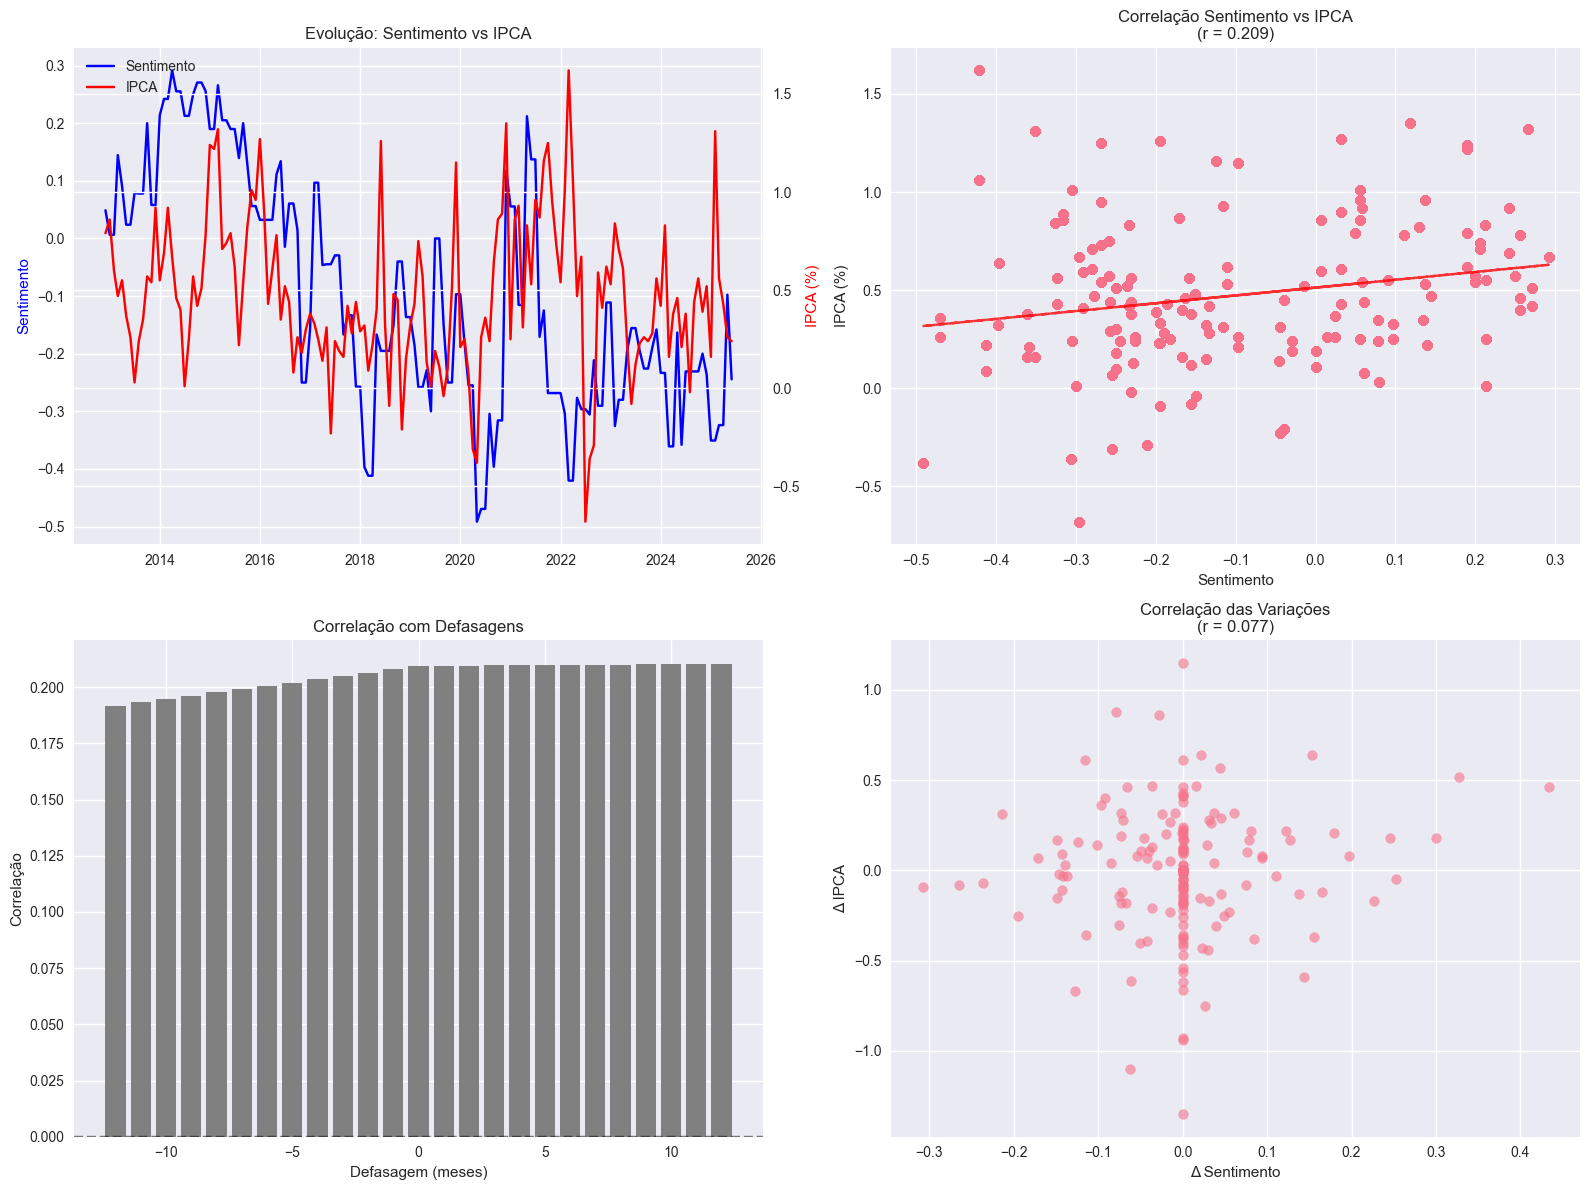

In [ ]:
# AdicionaR dados do IPCA
#______________________________________
# IPCA
#______________________________________
# Buscar IPCA (N√∫mero-√≠ndice) para o Brasil
df_ipca_indice = get_table(
    table_code='1737',  # Tabela com hist√≥rico mais longo para IPCA
    territorial_level='1',
    ibge_territorial_code='1',
    variable='2266',  # '2266' √© o c√≥digo para o N√∫mero-√≠ndice do IPCA - Total
    period='all',  # Pega todos os dados dispon√≠veis
    header='n'
)

df_ipca_indice = df_ipca_indice.rename(columns={'D2C': 'Data_Codigo', 'V': 'IPCA_Indice'})
df_ipca_indice['IPCA_Indice'] = df_ipca_indice['IPCA_Indice'].astype(float)

# Converter a coluna 'Data_Codigo' para o formato de data (AAAA-MM-DD)
df_ipca_indice['Data'] = pd.to_datetime(df_ipca_indice['Data_Codigo'], format='%Y%m')

# Calcular a varia√ß√£o mensal a partir do n√∫mero-√≠ndice
# IPCA % Mensal = (√çndice atual / √çndice anterior - 1) * 100
df_ipca_indice['IPCA'] = df_ipca_indice['IPCA_Indice'].pct_change() * 100

# Selecionar apenas as colunas relevantes e reordenar
df_ipca = df_ipca_indice[['Data', 'IPCA']].dropna() # Remover o primeiro NaN do pct_change

#______________________________________
# SELIC
#______________________________________
df_selic_pd = pd.DataFrame(df_selic)
df_selic_pd = df_selic_pd.reset_index().rename(columns={'Date': 'Data'})
df_selic_pd = df_selic_pd.rename(columns={'serie': 'Selic'})
df_selic_pd = df_selic_pd[['Data', 'Selic']]
df_selic_pd['Data'] = pd.to_datetime(df_selic_pd['Data']).dt.to_period('M').dt.to_timestamp()
df_selic_pd

#______________________________________
# SENTIMENTO
#______________________________________
df_sentimento_pd = preparar_dados_sentimento(sentimento)
df_sentimento_pd = df_sentimento_pd[['Data', 'sentimento']]
df_sentimento_pd

#______________________________________
# left join selic ipca
#______________________________________

# Realizar o left join dos DataFrames df_ipca e df_selic_pd usando a coluna 'Data'
df_merged_temp = pd.merge(df_sentimento_pd, df_ipca, on='Data', how='left')

# Perform the second left join: df_merged_temp with df_sentimento_pd
df_merged = pd.merge(df_merged_temp, df_selic_pd, on='Data', how='left')

print(df_merged)


# plotar a correla√ß√£o do sentimento com IPCA
fig7 = plot_correlacao_sentimento_ipca(df_merged)
fig7.show()

# salvar o gr√°fico
fig7.savefig('resultados/sentimento_vs_icpa.png', dpi=300, bbox_inches='tight')


#### üìäAn√°lise dos Gr√°ficos de Correla√ß√£o: Sentimento nas Atas do COPOM vs. IPCA 

Esta se√ß√£o apresenta uma an√°lise com foco na evolu√ß√£o temporal do sentimento e do IPCA, bem como nas correla√ß√µes com diferentes defasagens.

**Evolu√ß√£o Temporal: Sentimento vs. IPCA**


H√° uma alta volatilidade no IPCA mensal, com picos concentrados em eventos pontuais como choques de oferta (ex: pandemia, guerra, combust√≠veis).

O sentimento tende a ser mais negativo nos per√≠odos em que o IPCA sobe.

**Pontos de destaque:**

- *2021‚Äì2022:* forte volatilidade inflacion√°ria ‚Üí sentimento mais negativo.                                    
- *2023:* queda no IPCA ‚Üí leve melhora no sentimento, embora breve.                                                   

**Resumo Visual:**

- "A percep√ß√£o do Comit√™, refletida nas atas, indica uma rea√ß√£o √† din√¢mica da infla√ß√£o, ainda que de forma moderada e com certo grau de ru√≠do, o que sugere que outros fatores ‚Äî como atividade econ√¥mica, expectativas do mercado e cen√°rio externo ‚Äî tamb√©m desempenham papel relevante na formula√ß√£o das decis√µes de pol√≠tica monet√°ria..


#### **Correla√ß√£o Contempor√¢nea e das Varia√ß√µes**

* Correla√ß√£o linear entre Sentimento e IPCA (r = 0,209): levemente positiva.

* Interpreta√ß√£o: quando o tom das atas √© mais positivo, a varia√ß√£o do IPCA tende a estar um pouco mais alto ‚Äî o que contraria uma hip√≥tese intuitiva de que um sentimento negativo acompanha infla√ß√£o elevada.


**Coment√°rio metodol√≥gico:**

A baixa correla√ß√£o entre as varia√ß√µes sinaliza que movimentos abruptos no tom das atas n√£o acompanham mudan√ßas r√°pidas no IPCA, o que refor√ßa a ideia de que o discurso do COPOM busca estabilidade e previsibilidade, independentemente de varia√ß√µes mensais pontuais.

**Correla√ß√£o do sentimento com o IPCA em diferentes defasagens (de -12 a +12 meses)**

* O gr√°fico revela um padr√£o quase constante de correla√ß√£o positiva, levemente crescente.

* Os valores se mant√™m entre 0,18 e 0,21, com pico para defasagens positivas entre 6 e 10 meses.

**Defasagens Positivas (Sentimento ‚Üí IPCA):**

* Correla√ß√£o m√°xima ocorre quando o sentimento antecede o IPCA em at√© 10 meses.                                     
Interpreta√ß√£o: um sentimento mais positivo pode ser seguido por infla√ß√£o mais alta ‚Äî talvez porque o otimismo reflita um ambiente econ√¥mico mais aquecido, que, com defasagem, se traduz em maior press√£o de pre√ßos.

**Defasagens Negativas (IPCA ‚Üí Sentimento):**

* Correla√ß√£o tamb√©m positiva, embora um pouco menor (~0,18), sugerindo que infla√ß√£o passada n√£o necessariamente deteriora o sentimento atual.                             
Interpreta√ß√£o: Isso pode indicar que o discurso do COPOM n√£o responde imediatamente a press√µes inflacion√°rias, ou que responde de forma mais qualitativa do que quantitativa.

#### **Diferen√ßa em rela√ß√£o √† Selic:**

Enquanto o sentimento respondia negativamente e com atraso aos aumentos da Selic, aqui ele n√£o reage da mesma forma √† infla√ß√£o passada ‚Äî o que pode refletir a prioridade institucional dada √† pol√≠tica monet√°ria em rela√ß√£o ao diagn√≥stico da infla√ß√£o.

#### **Conclus√µes da An√°lise com IPCA**

* Rela√ß√£o contempor√¢nea entre sentimento e IPCA √© fraca e positiva, sugerindo que o tom das atas n√£o √© guiado exclusivamente pela infla√ß√£o do m√™s.

* Correla√ß√µes com defasagens mostram padr√£o est√°vel e levemente crescente, indicando que o sentimento passado pode antecipar varia√ß√µes inflacion√°rias futuras, mas com pouca for√ßa.

*  Diferen√ßa clara em rela√ß√£o √† an√°lise com a Selic: enquanto havia uma correla√ß√£o negativa defasada entre Selic e sentimento, a rela√ß√£o com o IPCA √© mais t√™nue e linearmente positiva.


#### **Hip√≥teses para investiga√ß√µes futuras:**

* O sentimento das atas reflete proje√ß√µes de infla√ß√£o e n√£o necessariamente a infla√ß√£o corrente.

* √â poss√≠vel que o tom mais otimista reflita expectativas de crescimento ‚Äî que, por sua vez, aumentam a demanda e pressionam os pre√ßos com defasagem.

* Avaliar se o sentimento tem poder preditivo para n√∫cleos do IPCA ou medidas de difus√£o da infla√ß√£o, ao inv√©s do IPCA cheio.


----------------------------

## üìä **PARTE 12: Gr√°fico Normalizado (Sentimento, Selic e IPCA)**
### A seguir, observa-se a evolu√ß√£o do sentimento nas atas do COPOM, Selic e IPCA normalizados, ao longo do tempo.

In [17]:
# Normalizar colunas entre 0 e 1
df = pd.DataFrame(df_merged)

# Colunas para normalizar
columns_to_normalize = ['IPCA', 'Selic', 'sentimento']

# Normalizar colunas entre 0 e 1
df_normalized = df.copy()
for col in columns_to_normalize:
    min_val = df[col].min()
    max_val = df[col].max()
    df_normalized[col] = (df[col] - min_val) / (max_val - min_val)

# Plotando valores normalizados usando Plotly Express com altura ajustada
fig = px.line(df_normalized, x='Data', y=columns_to_normalize,
              title='Valores Normalizados de IPCA, Selic e Sentimento ao Longo do Tempo (0-1)',
              labels={'value': 'Valores Normalizados', 'variable': 'Vari√°vel'},
              height=700) # <--- AQUI: Ajuste a altura para um valor maior

fig.update_layout(hovermode="x unified")

fig.write_html("resultados/grafico_normalizado.html")


##### **üìä Visualiza√ß√£o Comparativa: IPCA, Selic e Sentimento Normalizados (0‚Äì1)**

* Este gr√°fico mostra a evolu√ß√£o conjunta do IPCA, da Taxa Selic e do Sentimento das atas do COPOM, com todas as s√©ries normalizadas entre 0 e 1 para permitir uma compara√ß√£o visual direta das trajet√≥rias ao longo do tempo.

* A normaliza√ß√£o padroniza as escalas, facilitando a identifica√ß√£o de padr√µes relativos entre as vari√°veis, mesmo que suas unidades originais sejam distintas.

* √â poss√≠vel observar momentos de converg√™ncia e diverg√™ncia entre as curvas, por exemplo:

*2021‚Äì2022:* Selic e IPCA sobem juntos, enquanto o sentimento apresenta queda ‚Äî sugerindo coer√™ncia visual com os ciclos econ√¥micos.

* Per√≠odos de transi√ß√£o de pol√≠tica monet√°ria s√£o marcados por inflex√µes nas curvas da Selic e do sentimento.

##### Resumo da visualiza√ß√£o:                                     
Apesar de n√£o indicar causalidade nem correla√ß√£o estat√≠stica, o gr√°fico serve como uma ferramenta intuitiva para identificar per√≠odos relevantes, transi√ß√µes econ√¥micas e poss√≠veis rela√ß√µes temporais entre vari√°veis macroecon√¥micas e o discurso institucional.

----------------------------------

##### **Conclus√£o**

A an√°lise de sentimento das atas do COPOM ao longo do tempo, em conjunto com a trajet√≥ria da taxa Selic, permitiu identificar poss√≠veis rela√ß√µes entre o tom das comunica√ß√µes do Comit√™ e as decis√µes de pol√≠tica monet√°ria. Observou-se que per√≠odos de maior otimismo ou pessimismo nas atas frequentemente antecedem ou acompanham movimentos relevantes na taxa b√°sica de juros, sugerindo que o sentimento expresso pode servir como um indicador complementar para a compreens√£o da estrat√©gia do Banco Central.

###### **Pontos de Melhorias**

Para aprimorar a an√°lise, recomenda-se:
* Utilizar outros l√©xicos (dicion√°rios) de sentimento, inclusive adaptados ao contexto brasileiro.                                             
* Aplicar t√©cnicas de NLP mais avan√ßadas, como an√°lise de t√≥picos ou modelos de linguagem pr√©-treinados.                                          
* Refinar o pr√©-processamento dos textos para capturar nuances espec√≠ficas do vocabul√°rio econ√¥mico-financeiro.

###### **Sugest√µes de an√°lises a serem inclu√≠das**

* Relacionar o sentimento das atas com indicadores macroecon√¥micos, como PIB, infla√ß√£o, desemprego e cen√°rio externo.                                          
* Avaliar a influ√™ncia de eventos internacionais relevantes sobre o tom das comunica√ß√µes do COPOM.                                                                                   
                                        